In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df.isnull().sum()   

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
df.drop(['PassengerId',"Name","Ticket","Fare","Cabin"],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [50]:
df["Family"]=df["SibSp"]+df["Parch"]
df.drop(["SibSp","Parch"],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0
...,...,...,...,...,...,...
886,0,2,male,27.0,S,0
887,1,1,female,19.0,S,0
888,0,3,female,NaN,S,3
889,1,1,male,26.0,C,0


In [51]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
Family        0
dtype: int64

In [52]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
df["Age"]=si.fit_transform(df[["Age"]])

In [53]:
si1=SimpleImputer(strategy="most_frequent")
df["Embarked"]=si1.fit_transform(df[["Embarked"]]).ravel()

In [54]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
Family      0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    object 
 5   Family    891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [56]:
df.describe()

,Survived,Pclass,Age,Family
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.904602
std,0.486592,0.836071,13.002015,1.613459
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000
75%,1.000000,3.000000,35.000000,1.000000
max,1.000000,3.000000,80.000000,10.000000


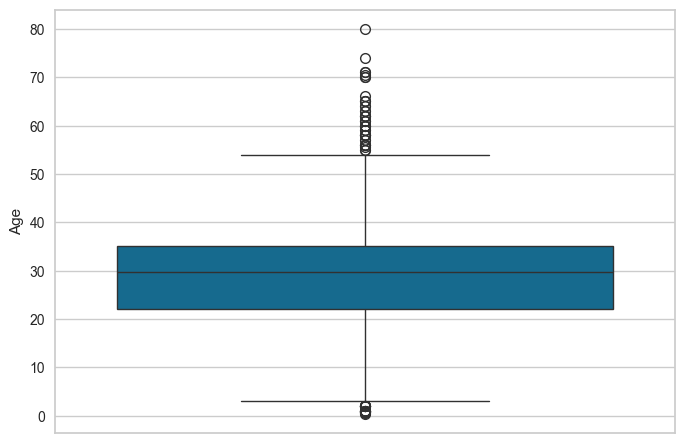

In [57]:
sns.boxplot(df["Age"])
plt.show()

In [58]:
q1=df["Age"].quantile(0.25)
q3=df["Age"].quantile(0.75)

In [59]:
iqr=q3-q1

In [60]:
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)

In [61]:
min_range,max_range

(np.float64(2.5), np.float64(54.5))

In [62]:
df[df["Age"]<=max_range]

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,22.000000,S,1
1,1,1,female,38.000000,C,1
2,1,3,female,26.000000,S,0
3,1,1,female,35.000000,S,1
4,0,3,male,35.000000,S,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,S,0
887,1,1,female,19.000000,S,0
888,0,3,female,29.699118,S,3
889,1,1,male,26.000000,C,0


In [63]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[["Sex","Embarked"]]=oe.fit_transform(df[["Sex","Embarked"]])
df

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1.0,22.000000,2.0,1
1,1,1,0.0,38.000000,0.0,1
2,1,3,0.0,26.000000,2.0,0
3,1,1,0.0,35.000000,2.0,1
4,0,3,1.0,35.000000,2.0,0
...,...,...,...,...,...,...
886,0,2,1.0,27.000000,2.0,0
887,1,1,0.0,19.000000,2.0,0
888,0,3,0.0,29.699118,2.0,3
889,1,1,1.0,26.000000,0.0,0


In [64]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

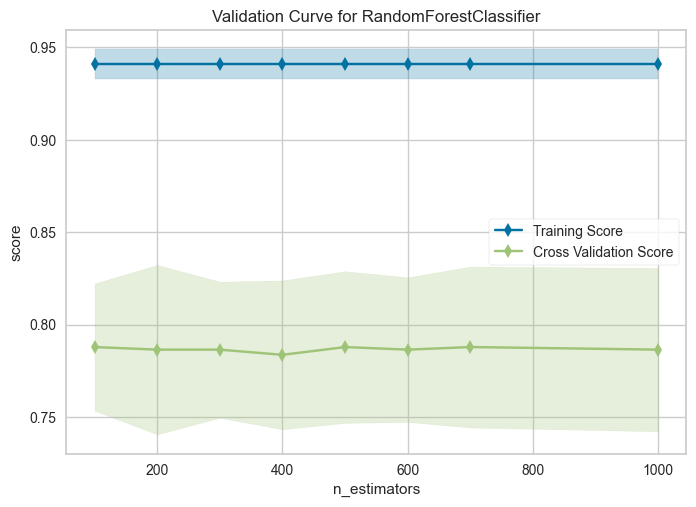

TypeError: cannot unpack non-iterable ValidationCurve object

In [67]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import validation_curve
num_est=[100,200,300,400,500,600,700,1000]
train_scores,test_scores=validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name="n_estimators",param_range=num_est,cv=3,scoring="accuracy")

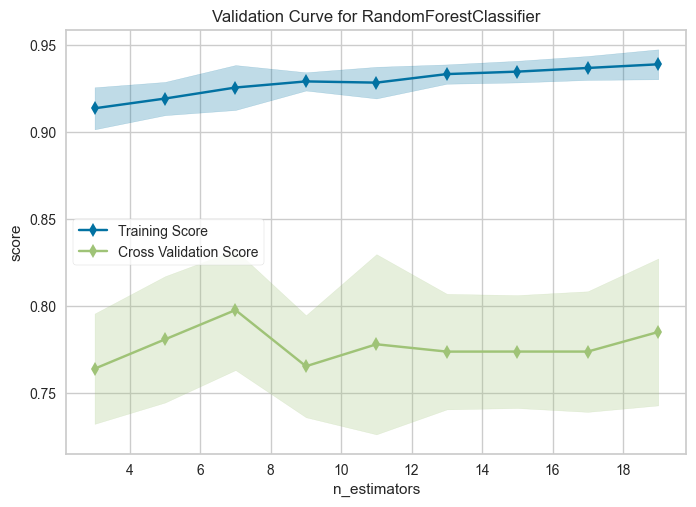

TypeError: cannot unpack non-iterable ValidationCurve object

In [ ]:

from yellowbrick.model_selection import validation_curve
max_depth=[3,5,7,9,11,13,15,17,19]
train_scores,test_scores=validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name="n_estimators",param_range=max_depth,cv=3,scoring="accuracy")

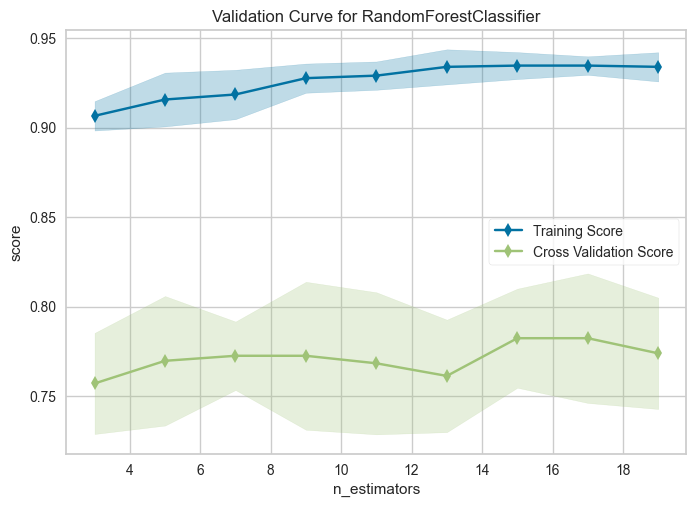

TypeError: cannot unpack non-iterable ValidationCurve object

In [ ]:

from yellowbrick.model_selection import validation_curve
min_samples_split=[3,5,7,9,11,13,15,17,19]
train_scores,test_scores=validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name="n_estimators",param_range=min_samples_split,cv=3,scoring="accuracy")

In [ ]:

rf=RandomForestClassifier(n_estimators=700,max_depth=7,min_samples_split=15)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=15, n_estimators=700)

In [ ]:
train_pred=rf.predict(X_train)
test_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,train_pred)

0.851123595505618

In [ ]:
accuracy_score(y_test,test_pred)

0.8379888268156425

In [ ]:
import joblib
joblib.dump((rf,oe,sc),"titanic.joblib")